# Part I - Prosper Loan Data Exploration 
## by Josephine Ochai

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangle">Preliminary Wrangling</a></li>
<li><a href="#univar">Univariate Exploration</a></li>
<li><a href="#bivar">Bivariate Exploration</a></li>
<li><a href="#multi">Multivariate Exploration</a></li>
</ul>

<a id='intro'></a>
## Introduction
> The dataset chosen for analysis is the Prosper Loan Data Exploration dataset which contains approximately 114,000 records of loans issued by Prosper to various people with variables that may or may not be influential to the loan payment status of these individuals. There are 81 attributes in this data including -but not limited to- the loan status, loan original amount, borrower APR & interest rate, credit score, employment status of the individuals as well as their income range. 

<a id='wrangle'></a>
## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# reading the loan data from Prosper into a pandas dataframe
prosperloan_df = pd.read_csv('prosperLoanData.csv')
print(prosperloan_df.shape)
prosperloan_df.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
prosperloan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
# check for duplicates
sum(prosperloan_df.duplicated())

0

### What is the structure of your dataset?

> There are 113,937 loan records in the dataset with 81 features on each loan. Most variables are numeric in nature (61 out of 81 variables)

### What is/are the main feature(s) of interest in your dataset?

> I am interested in figuring out the variables that affect the status of loan payments in the dataset and to what degrees. Also, I would like to investigate how the features in the dataset relate to one another.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I suspect that the following variables will have a significant effect on the status of each loan: Term, BorrowerRate, BorrowerAPR, EmploymentStatus, IsBorrowerHomeowner, CreditScoreRangeLower, CreditScoreRangeUpper, IncomeRange, LoanOriginalAmount, MonthlyLoanPayment and Recommendations. 

Other variables are excluded from the dataset for clarity purpose.



In [5]:
prosperloan = prosperloan_df.copy()

In [6]:
variables = ['LoanStatus','Term','BorrowerRate','BorrowerAPR', 'EmploymentStatus','IsBorrowerHomeowner',
             'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'IncomeRange', 'LoanOriginalAmount','MonthlyLoanPayment',
             'Recommendations']

prosperloan = prosperloan[prosperloan.columns[prosperloan.columns.isin(variables)]]


In [7]:
prosperloan.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,Recommendations
0,36,Completed,0.16516,0.1580,Self-employed,True,640.0,659.0,"$25,000-49,999",9425,330.43,0
1,36,Current,0.12016,0.0920,Employed,False,680.0,699.0,"$50,000-74,999",10000,318.93,0
2,36,Completed,0.28269,0.2750,Not available,False,480.0,499.0,Not displayed,3001,123.32,0
3,36,Current,0.12528,0.0974,Employed,True,800.0,819.0,"$25,000-49,999",10000,321.45,0
4,36,Current,0.24614,0.2085,Employed,True,680.0,699.0,"$100,000+",15000,563.97,0


In [8]:
prosperloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Term                   113937 non-null  int64  
 1   LoanStatus             113937 non-null  object 
 2   BorrowerAPR            113912 non-null  float64
 3   BorrowerRate           113937 non-null  float64
 4   EmploymentStatus       111682 non-null  object 
 5   IsBorrowerHomeowner    113937 non-null  bool   
 6   CreditScoreRangeLower  113346 non-null  float64
 7   CreditScoreRangeUpper  113346 non-null  float64
 8   IncomeRange            113937 non-null  object 
 9   LoanOriginalAmount     113937 non-null  int64  
 10  MonthlyLoanPayment     113937 non-null  float64
 11  Recommendations        113937 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(3)
memory usage: 9.7+ MB


Assessing the dataset, the variables are of correct data types. There are, however some missing values. These are visualised below:


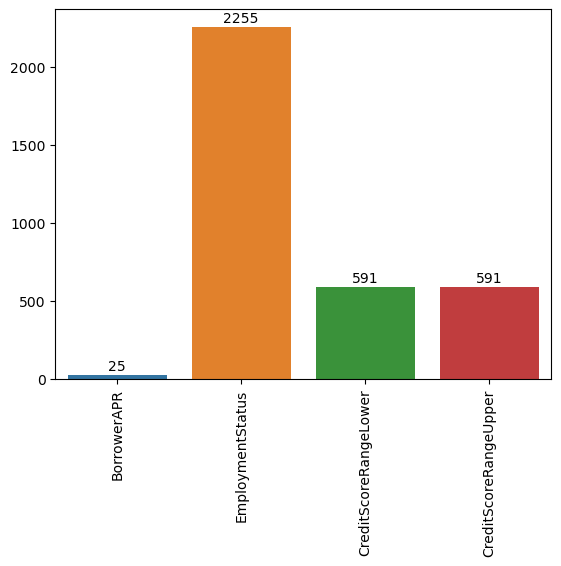

In [9]:
# Dropping the columns that do not have any NaN values
na_counts = prosperloan.drop(['Term', 'LoanStatus', 'BorrowerRate', 'IsBorrowerHomeowner','LoanOriginalAmount',
                              'MonthlyLoanPayment','Recommendations','IncomeRange'], axis=1).isna().sum()
sns.barplot(x=na_counts.index.values, y=na_counts)

# get the current tick locations and labels
plt.xticks(rotation=90) 

# Logic to print value on each bar
for i in range (na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count+100, count, ha = 'center', va='top')

The missing values for each numeric variable are replaced with the mean while that of the categorical variables are dropped.

In [10]:
# replace missing numerical variables with mean
num_var = ['BorrowerAPR','CreditScoreRangeLower','CreditScoreRangeUpper']
for i in num_var:
    prosperloan[i] = prosperloan[i].replace(np.nan, round(prosperloan[i].mean()))

Inspecting the categorical variables:

In [11]:
print(prosperloan['EmploymentStatus'].unique())

['Self-employed' 'Employed' 'Not available' 'Full-time' 'Other' nan
 'Not employed' 'Part-time' 'Retired']


In [12]:
# replace 'Not available' values to null values
prosperloan['EmploymentStatus'] = prosperloan['EmploymentStatus'].replace('Not available', np.nan)

In [13]:
prosperloan['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [14]:
# replace 'Not displayed' values to null values and 'Not employed' to $0
prosperloan = prosperloan.replace({'IncomeRange': {"Not displayed": np.nan,
                        "Not employed":"$0"}})

In [15]:
print(prosperloan['IncomeRange'].unique())

['$25,000-49,999' '$50,000-74,999' nan '$100,000+' '$75,000-99,999'
 '$1-24,999' '$0']


In [16]:
prosperloan['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
$1-24,999          7274
$0                 1427
Name: IncomeRange, dtype: int64

In [17]:
# drop all missing values (present in 'Income Range' and 'Employment Status' only) 
prosperloan = prosperloan.dropna()

In [18]:
# convert IncomeRange into an ordered categorical type
ordinal_var =['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var)
prosperloan['IncomeRange'] = prosperloan['IncomeRange'].astype(ordered_var)

In [19]:
# Create a new column that takes the mean of the lower and upper ranges of each credit score
prosperloan['CreditScoreAvg'] = prosperloan.iloc[:, 6:8].mean(axis=1)
prosperloan.drop(['CreditScoreRangeLower', 'CreditScoreRangeUpper'], axis = 1, inplace = True)


In [20]:
# view the data info to show all observations have been corrected. Code below shows data has now been reduced to 10,196 records.
prosperloan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106196 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Term                 106196 non-null  int64   
 1   LoanStatus           106196 non-null  object  
 2   BorrowerAPR          106196 non-null  float64 
 3   BorrowerRate         106196 non-null  float64 
 4   EmploymentStatus     106196 non-null  object  
 5   IsBorrowerHomeowner  106196 non-null  bool    
 6   IncomeRange          106196 non-null  category
 7   LoanOriginalAmount   106196 non-null  int64   
 8   MonthlyLoanPayment   106196 non-null  float64 
 9   Recommendations      106196 non-null  int64   
 10  CreditScoreAvg       106196 non-null  float64 
dtypes: bool(1), category(1), float64(4), int64(3), object(2)
memory usage: 8.3+ MB


In [21]:
prosperloan.head()

,Term,LoanStatus,BorrowerAPR,BorrowerRate,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,CreditScoreAvg
0,36,Completed,0.16516,0.1580,Self-employed,True,"$25,000-49,999",9425,330.43,0,649.5
1,36,Current,0.12016,0.0920,Employed,False,"$50,000-74,999",10000,318.93,0,689.5
3,36,Current,0.12528,0.0974,Employed,True,"$25,000-49,999",10000,321.45,0,809.5
4,36,Current,0.24614,0.2085,Employed,True,"$100,000+",15000,563.97,0,689.5
5,60,Current,0.15425,0.1314,Employed,True,"$100,000+",15000,342.37,0,749.5


In [22]:
# descriptive statistics for numeric variables
prosperloan.describe()

,Term,BorrowerAPR,BorrowerRate,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,CreditScoreAvg
count,106196.000000,106196.000000,106196.000000,106196.000000,106196.000000,106196.000000,106196.000000
mean,41.182342,0.220297,0.193025,8567.894214,279.044613,0.051273,700.748070
std,10.725161,0.080903,0.075207,6265.540387,192.096696,0.343577,56.375095
min,12.000000,0.006530,0.000000,1000.000000,0.000000,0.000000,529.500000
25%,36.000000,0.157130,0.133475,4000.000000,138.950000,0.000000,669.500000
50%,36.000000,0.211010,0.184000,7000.000000,229.240000,0.000000,689.500000
75%,36.000000,0.285740,0.251100,12000.000000,377.640000,0.000000,729.500000
max,60.000000,0.423950,0.360000,35000.000000,2251.510000,39.000000,889.500000


<a id='univar'></a>
## Univariate Exploration

> To begin, the distribution of the main variable of interest -loan status is depicted below:

In [23]:
prosperloan.LoanStatus.value_counts()

Current                   56576
Completed                 33464
Chargedoff                10612
Defaulted                  3271
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     1
Name: LoanStatus, dtype: int64

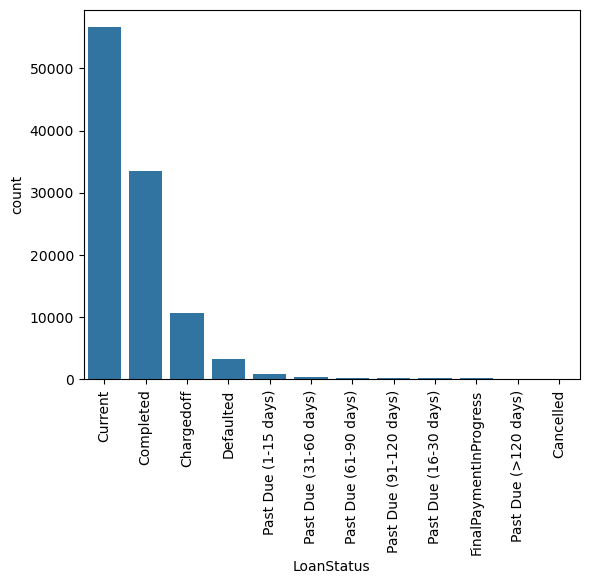

In [24]:
color = sns.color_palette()[0]
order = prosperloan.LoanStatus.value_counts().index
sns.countplot(data= prosperloan, x='LoanStatus', color = color, order = order)
plt.xticks(rotation=90);

The chart above depicts various degrees of 'past due' status with varying delinquency buckets e.g a loan status may be past due by 15 days or within 31-60 days. Because these variations are in the minority, for the purpose of this analysis, they will all be viewed as just 'past due'.

In [25]:
prosperloan['LoanStatus'] = prosperloan.LoanStatus.apply(lambda col: col.split('(')[0] if col in 
                         ['Past Due (1-15 days)', 'Past Due (16-30 days)','Past Due (31-60 days)', 'Past Due (61-90 days)',
                          'Past Due (91-120 days)', 'Past Due (>120 days)'] else col)#, axis=1)

In [26]:
prosperloan.LoanStatus.value_counts()

Current                   56576
Completed                 33464
Chargedoff                10612
Defaulted                  3271
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     1
Name: LoanStatus, dtype: int64

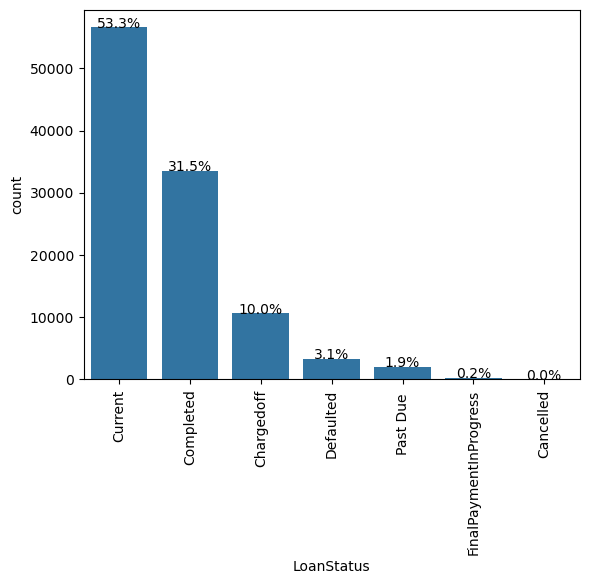

In [27]:
# Considering the same chart from above,the proportions of each bar relative to the whole is printed for eah bar
color = sns.color_palette()[0]
loanstatus_count = prosperloan.LoanStatus.value_counts()
order = loanstatus_count.index
sns.countplot(data= prosperloan, x='LoanStatus', color = color, order = order);

loan_sum = prosperloan['LoanStatus'].value_counts().sum()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = loanstatus_count[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/loan_sum)

    # print the annotation atop the bar
    plt.text(loc, count+10, pct_string, ha = 'center', color = 'black')
    
#from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
#rcParams['figure.figsize'] = 12,4

The figure above shows the majority of borrowers are still within the time period of using the loan i.e. majority of loans are in current status. Also, more borrowers have completed loan repayments than have defaulted or are past due payment date. Little to no records exist for loans that have either been canceled or of which final payment is in progress.

Next, looking at variables- Income Range, Employment Status and IsBorrowerHomweowner:

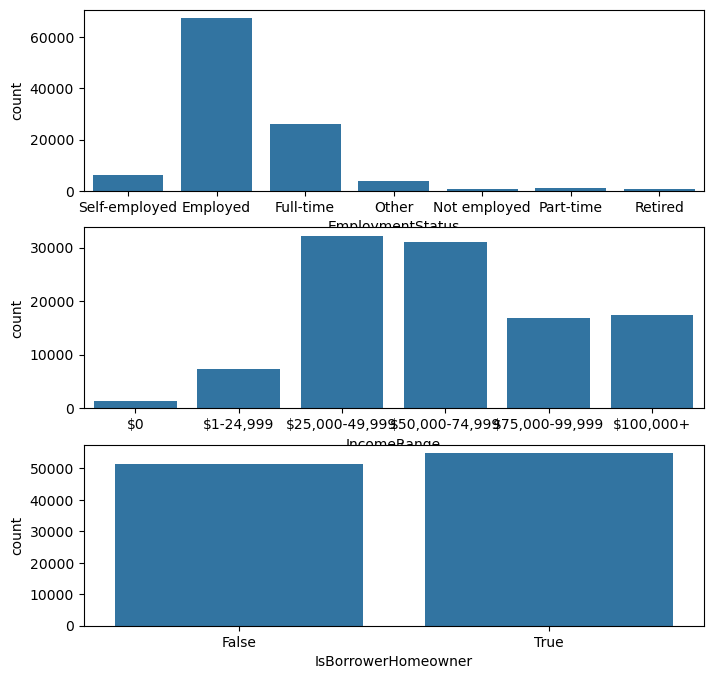

In [28]:
# plotting all 3 together to get an idea of each variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [8,8])

base_color = sns.color_palette()[0]
sns.countplot(data = prosperloan, x = 'EmploymentStatus', color = base_color, ax = ax[0])
sns.countplot(data = prosperloan, x = 'IncomeRange', color = base_color, ax = ax[1])
sns.countplot(data = prosperloan, x = 'IsBorrowerHomeowner', color = base_color, ax = ax[2])

plt.show()

The charts indicate most people that took loans have an average income range between $25,000 -$75,000 and are mostly employed. Retired, part-time and unemployed individuals are granted the least loans. Also, more homeowners are granted loans but it seems to not make any significant difference if one does not own a home.

Next, the Creditscore variable is explored:

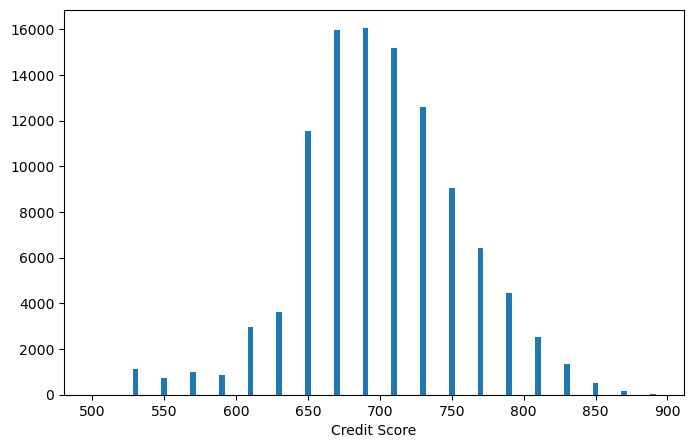

In [29]:
bins = np.arange(500, prosperloan['CreditScoreAvg'].max()+4, 4)
plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan, x = 'CreditScoreAvg', bins = bins)
plt.xlabel('Credit Score')
plt.show()


CreditScoreAvg seems unimodal, but the distribution is slightly skewed right and looks a little narrower than a typical normal distribution. The minimum value in the dataset is a little above 500 and the maximum value is closer to 900. This is indicative of a possibility that Prosper usually requires their borrowers to have a minimum credit score of 600 in order to be granted loans, the distribution shows fewer loans are granted to individuals with credit scores ranging between 530 -640.
Lastly, CreditScoreAvg is a discrete quantitative variable.

Looking at BorrowerAPR and interest rate:

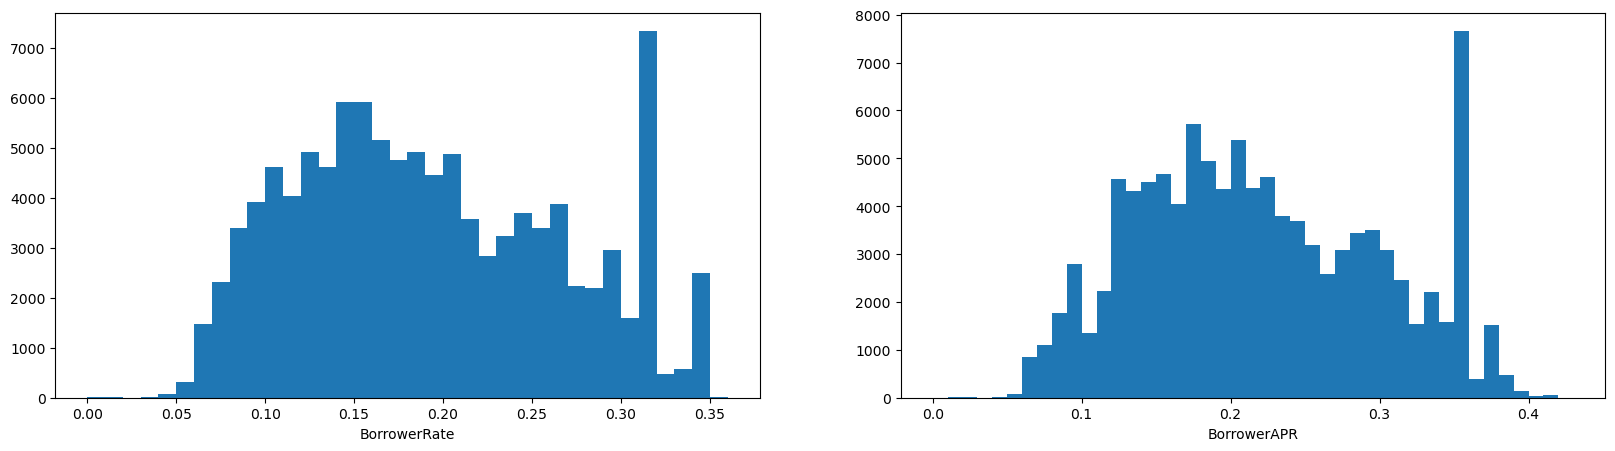

In [30]:
# Resize the chart, and have two plots side-by-side
plt.figure(figsize = [20, 5])
Variables = ['BorrowerRate','BorrowerAPR']
binsize = 0.01
for var in Variables:
    plt.subplot(1, 2, Variables.index(var)+1)
    bins = np.arange(0, prosperloan[var].max()+binsize, binsize)
    plt.hist(data = prosperloan, x = var, bins = bins)
    plt.xlabel(var)

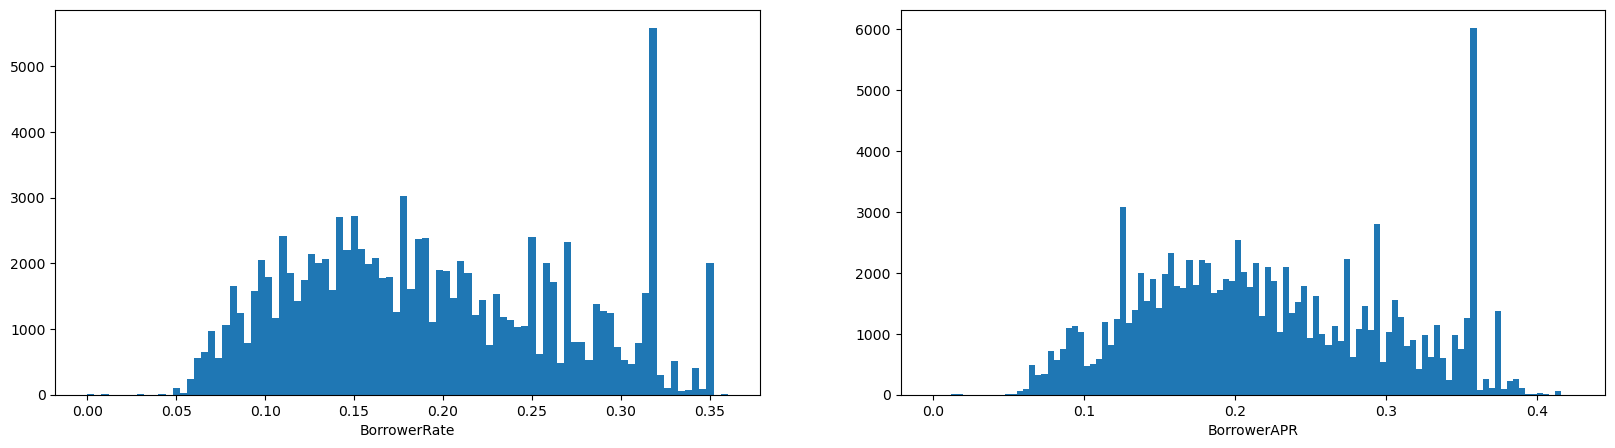

In [31]:
# investigating further on a smaller bin size
plt.figure(figsize = [20, 5])
binsize = 0.004
for var in Variables:
    plt.subplot(1, 2, Variables.index(var)+1)
    bins = np.arange(0, prosperloan[var].max()+binsize, binsize)
    plt.hist(data = prosperloan, x = var, bins = bins)
    plt.xlabel(var)
    #sns.displot(prosperloan[var], kde=False);

The distributions for both the BorrowerRate and BorrowerAPR variables are very similar even when plotted on smaller bin sizes. They are both clearly unimodal with peak values a little above 0.3. There are also varying degrees of spikes in frequency at several bars, though, these spikes pale in comparison to the respective modal values for each variables. Both features seem to be positively correlated.

Inspecting the LoanOriginalAmount below:

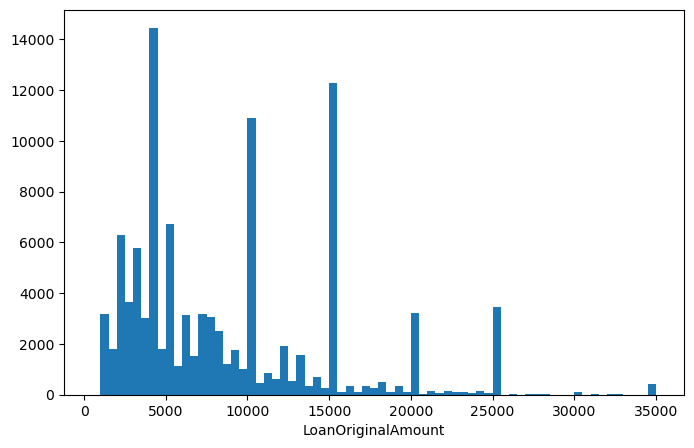

In [32]:
bins = np.arange(500, prosperloan['LoanOriginalAmount'].max()+ 500, 500)

plt.figure(figsize=[8, 5])
plt.hist(data = prosperloan, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('LoanOriginalAmount')
plt.show()

The plot shows that there are more loans issued with smaller values of LoanOriginalAmount than with larger values. Also, there seems to be 3 major spikes: one at roughly 4500 -5k, the second at about 10k and the last at roughly 15k and there is a gradual downward ramp in loan amounts after each major peak. 

Let's inspect the MonthlyLoanPayment feature next.

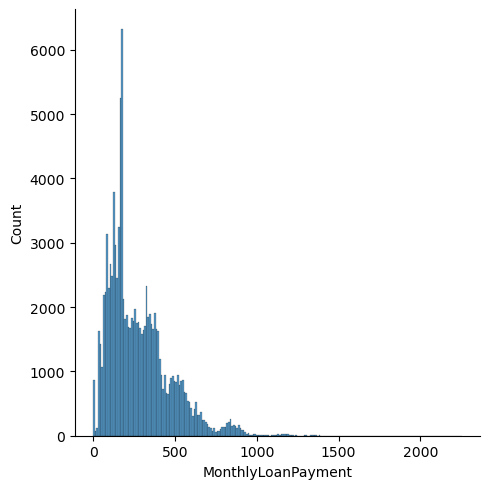

In [33]:
sns.displot(prosperloan['MonthlyLoanPayment'], kde=False);


There is a long tail in this distribution, so a log scale is used to plot it instead:

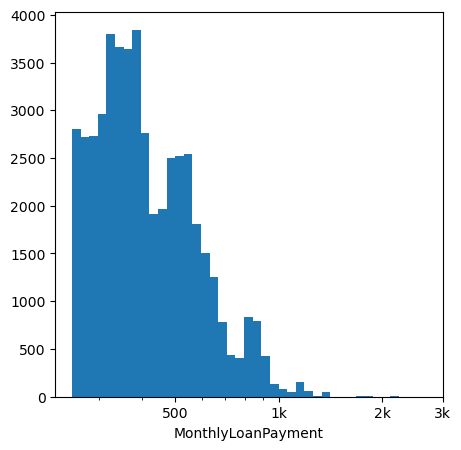

In [34]:
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(prosperloan['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[5, 5])
plt.hist(data = prosperloan, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 3e3], [500, '1k', '2k', '3k'])
plt.xlabel('MonthlyLoanPayment')
plt.show()

MonthlyLoanPayment has a long-tailed distribution with more loans being on the variable's lower end and few on its high end. On the log scale, the peak value is at approximately 3800. Also, there are 3 visible spikes in the data's plot, the first being the highest and the last, the lowest. The chart also shows a gradual decline in MonthlyLoanPayment values after each spike.

Exploring the Recommendations feature:

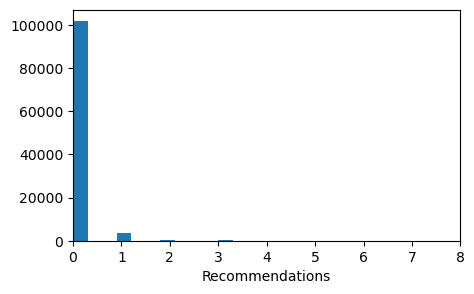

In [35]:
bins = np.arange(0, prosperloan['Recommendations'].max()+0.3, 0.3
                )

plt.figure(figsize=[5, 3])
plt.hist(data = prosperloan, x = 'Recommendations', bins = bins)
plt.xlim([0, 8])
plt.xlabel('Recommendations')
plt.show()



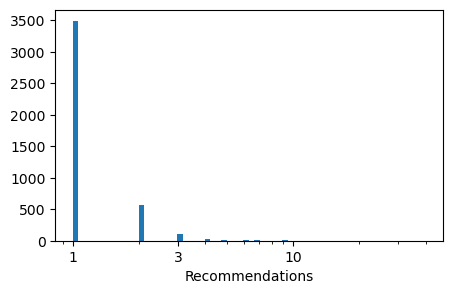

In [36]:
# plotting on a log scale to see if bars are more spread out 
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(prosperloan['Recommendations'].max())+log_binsize, log_binsize)

plt.figure(figsize=[5, 3])
plt.hist(data = prosperloan, x = 'Recommendations', bins = bins)
plt.xscale('log')
plt.xticks([1, 3, 10], [1, 3, 10])
plt.xlabel('Recommendations')
plt.show()

The histogram plot of the Recommendations distribution indicates that many individuals were granted loan with little to no recommendations from other people. This does not seem to be an interesting feature; I expected more loans to be given to borrowers that can provide more recommendations.

In [37]:
prosperloan['Term'].value_counts()

36    80037
60    24545
12     1614
Name: Term, dtype: int64

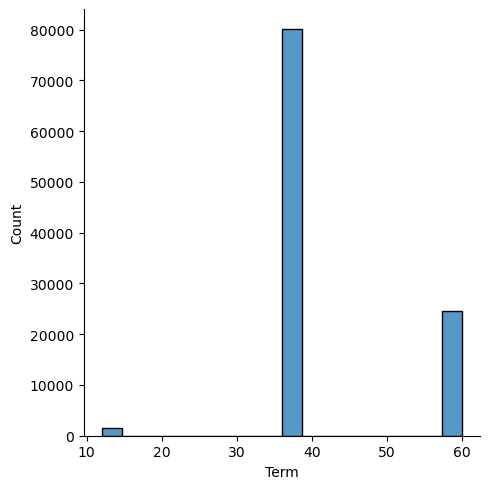

In [38]:
sns.displot(prosperloan['Term'], kde=False);

The chart shows most loans are given with a 36 month term length, 3 times as much as the loans issued with a 60 months (5 years) term time. The least number of loans are given to borrowers who opt for a term time of 1 year. Also, term is a discrete numeric variable.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Loan Status variable had a distribution that showed most loans having a current status. Following that were loans for which payments had been completed. More borrowers had completed loan repayments than they had been charged off,  defaulted or gone past their due payment date. The plot also indicated that little to no records existed for loans that had either been canceled or for which final payment was in progress. 

> I noticed that the loan status distribution had various degrees of 'past due' status with varying delinquency buckets e.g a loan status may be past due by 15 days or within 31-60 days. Because these variations were in the minority, I lumped them all as one category - 'past due' for the purpose of my analysis.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I performed log transforms on variables; MonthlyLoanPayment and Recommendations because they had a long tail in their distribution causing their plots to be skewed to varying degrees. Also while exploring the Recommendation variable, I changed the x-axis limit to try to capture the underlying patterns of the more occurring recommendation values in the dataset.  

<a id='bivar'></a>
## Bivariate Exploration

> Firstly, the pairwise correlations present between the numerical and categorical features in the prosper loan dataset are investigated.

In [39]:
numeric_vars = ['CreditScoreAvg', 'BorrowerRate','BorrowerAPR', 'LoanOriginalAmount', 'MonthlyLoanPayment','Term','Recommendations']
categoric_vars = ['LoanStatus', 'EmploymentStatus', 'IncomeRange', 'IsBorrowerHomeowner']

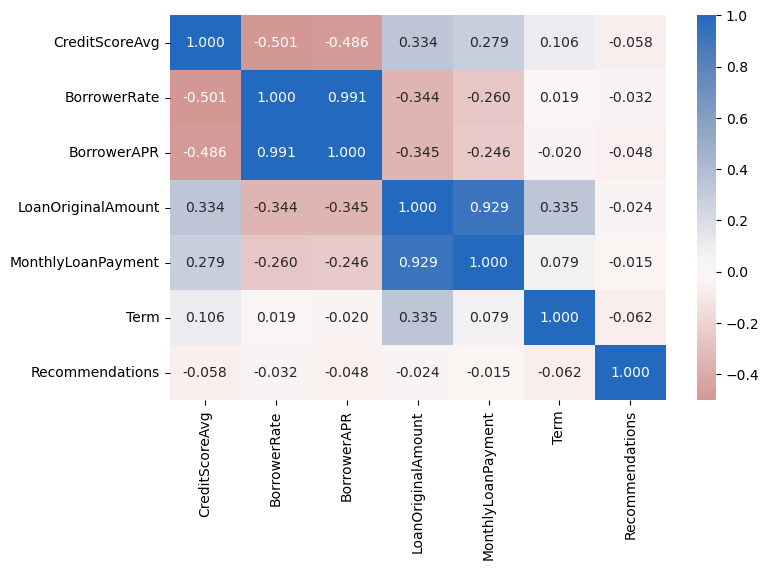

In [40]:
# correlation plot to investigate relationship amongst numerical features
plt.figure(figsize = [8, 5])
sns.heatmap(prosperloan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

The correlation plot above suggests very strong positive correlations between BorrowerAPR & BorrowerRate, and LoanOriginalAmount & MonthlyLoanPayment. On the other hand both BorrowerAPR and BorrowerRate are negatively correlated with the latter variables mentioned previously and the credit score variable.

prosperloan.shape= (106196, 11)
prosperloan_samp.shape= (1000, 11)


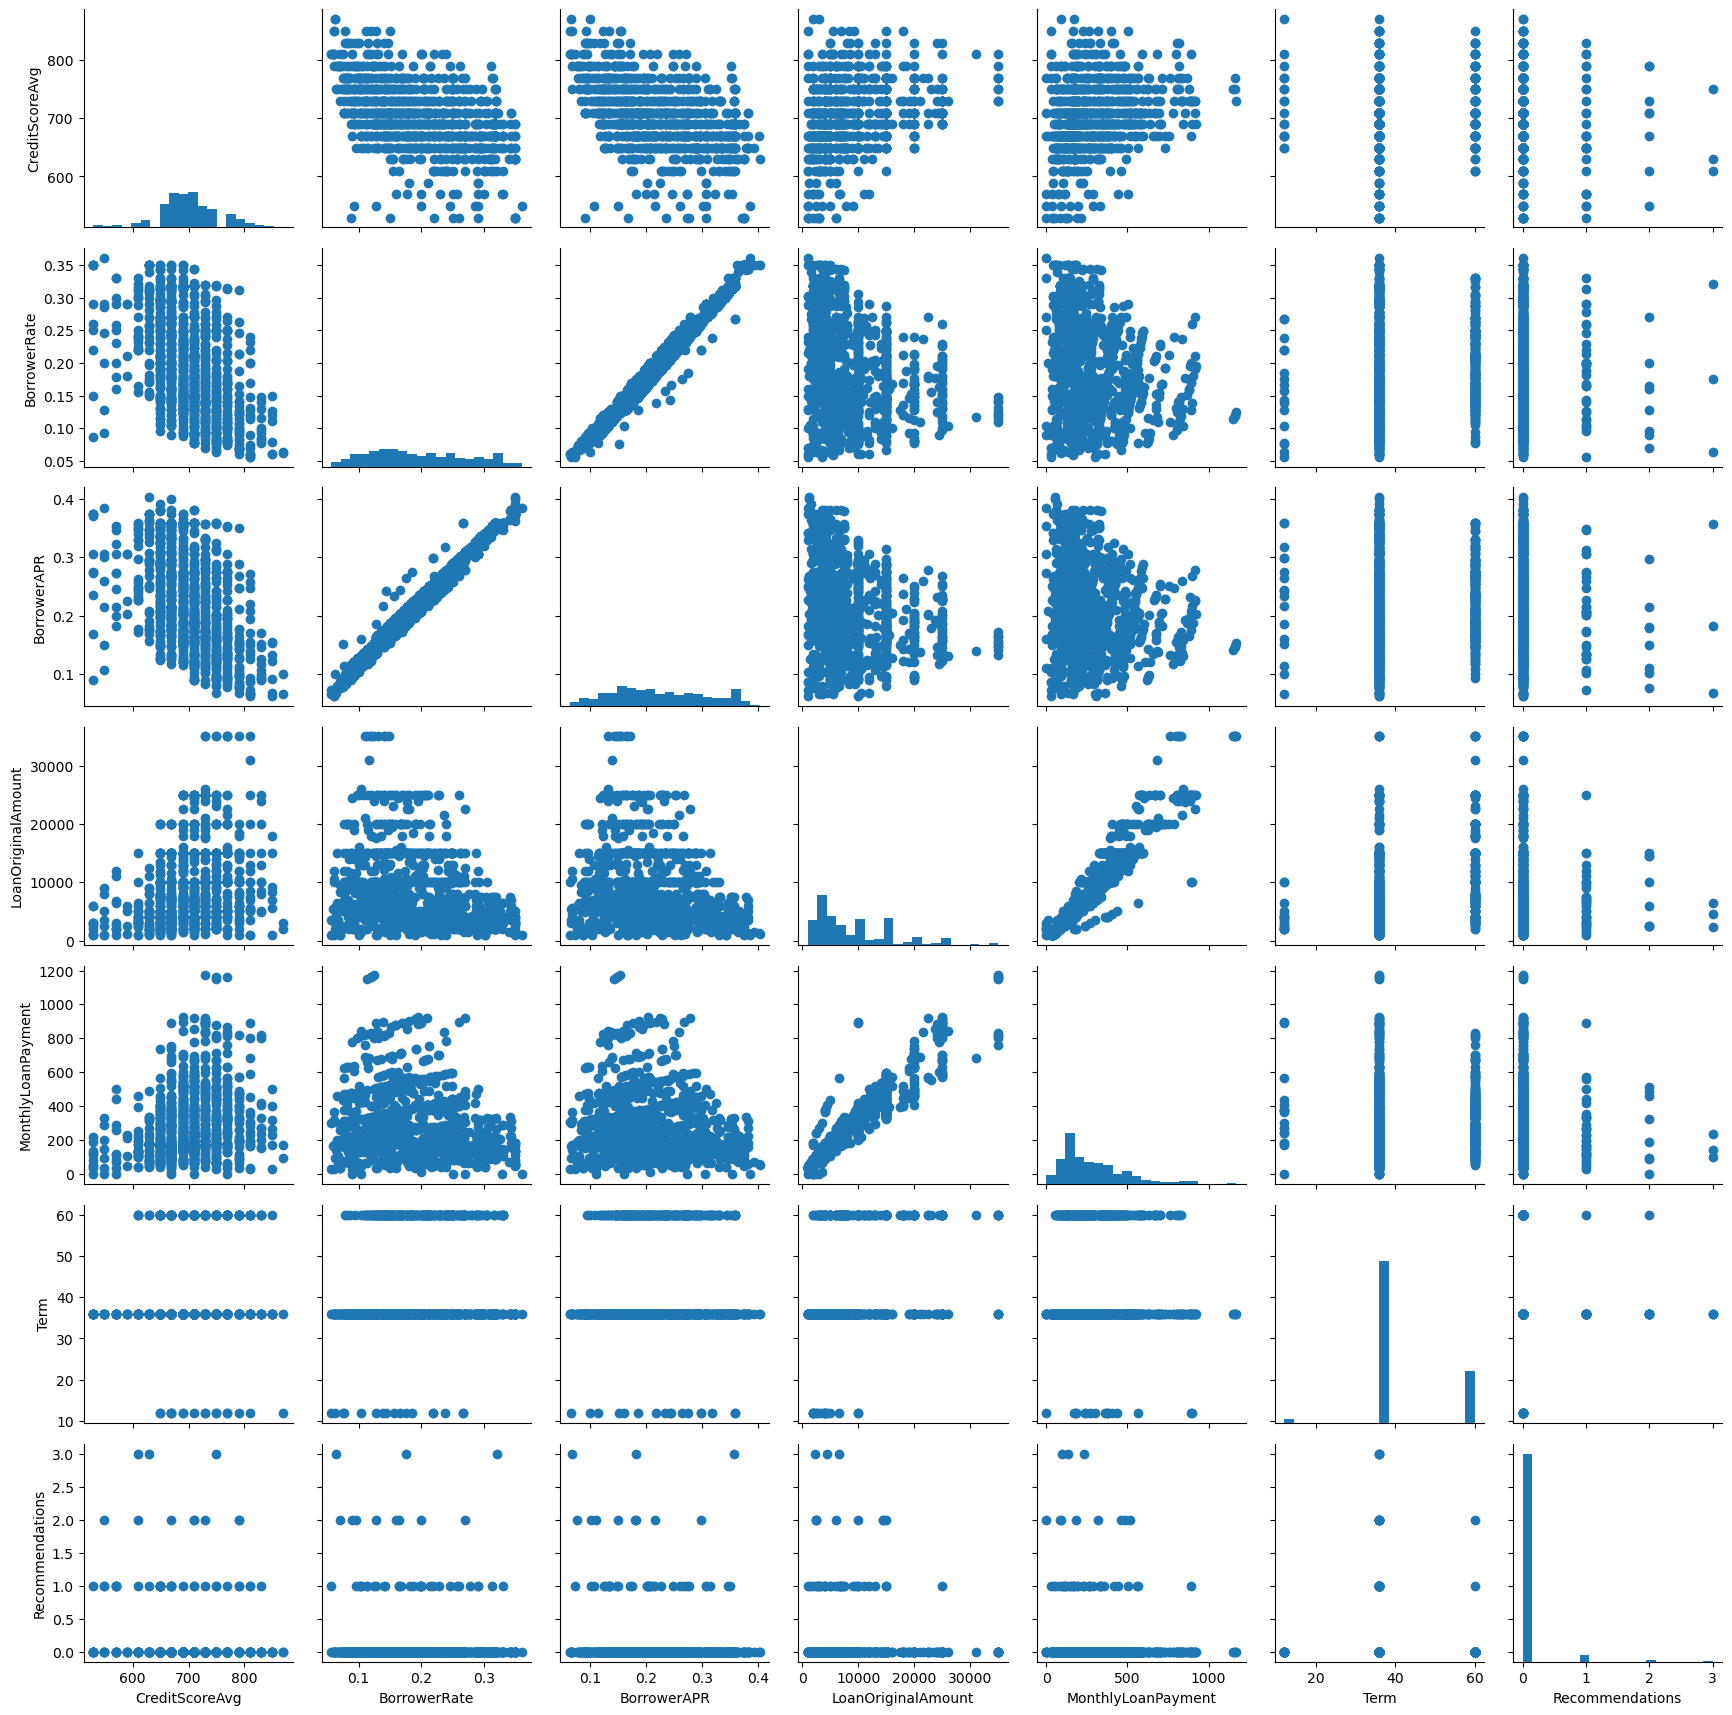

In [41]:
# plot matrix: sample 1000 loans so that plots are clearer and they render faster
print("prosperloan.shape=",prosperloan.shape)
prosperloan_samp = prosperloan.sample(n=1000, replace = False)
print("prosperloan_samp.shape=",prosperloan_samp.shape)

g = sns.PairGrid(data = prosperloan_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

The plot matrix above shows more clearly, the correlations existing between the variables that were mentioned under the heat map plot explanation earlier.

Term and Recommendations do not have any strong correlations with the other numeric variables, thus, both will not be explored further. I initially expected more borrowers with a high number of recommendations to have higher credit scores and lower interest rates, but this variable did not seem influential in that regard.

Looking at how the remaining numerical features correlate with the qualitative variables:


<Figure size 1000x1000 with 0 Axes>

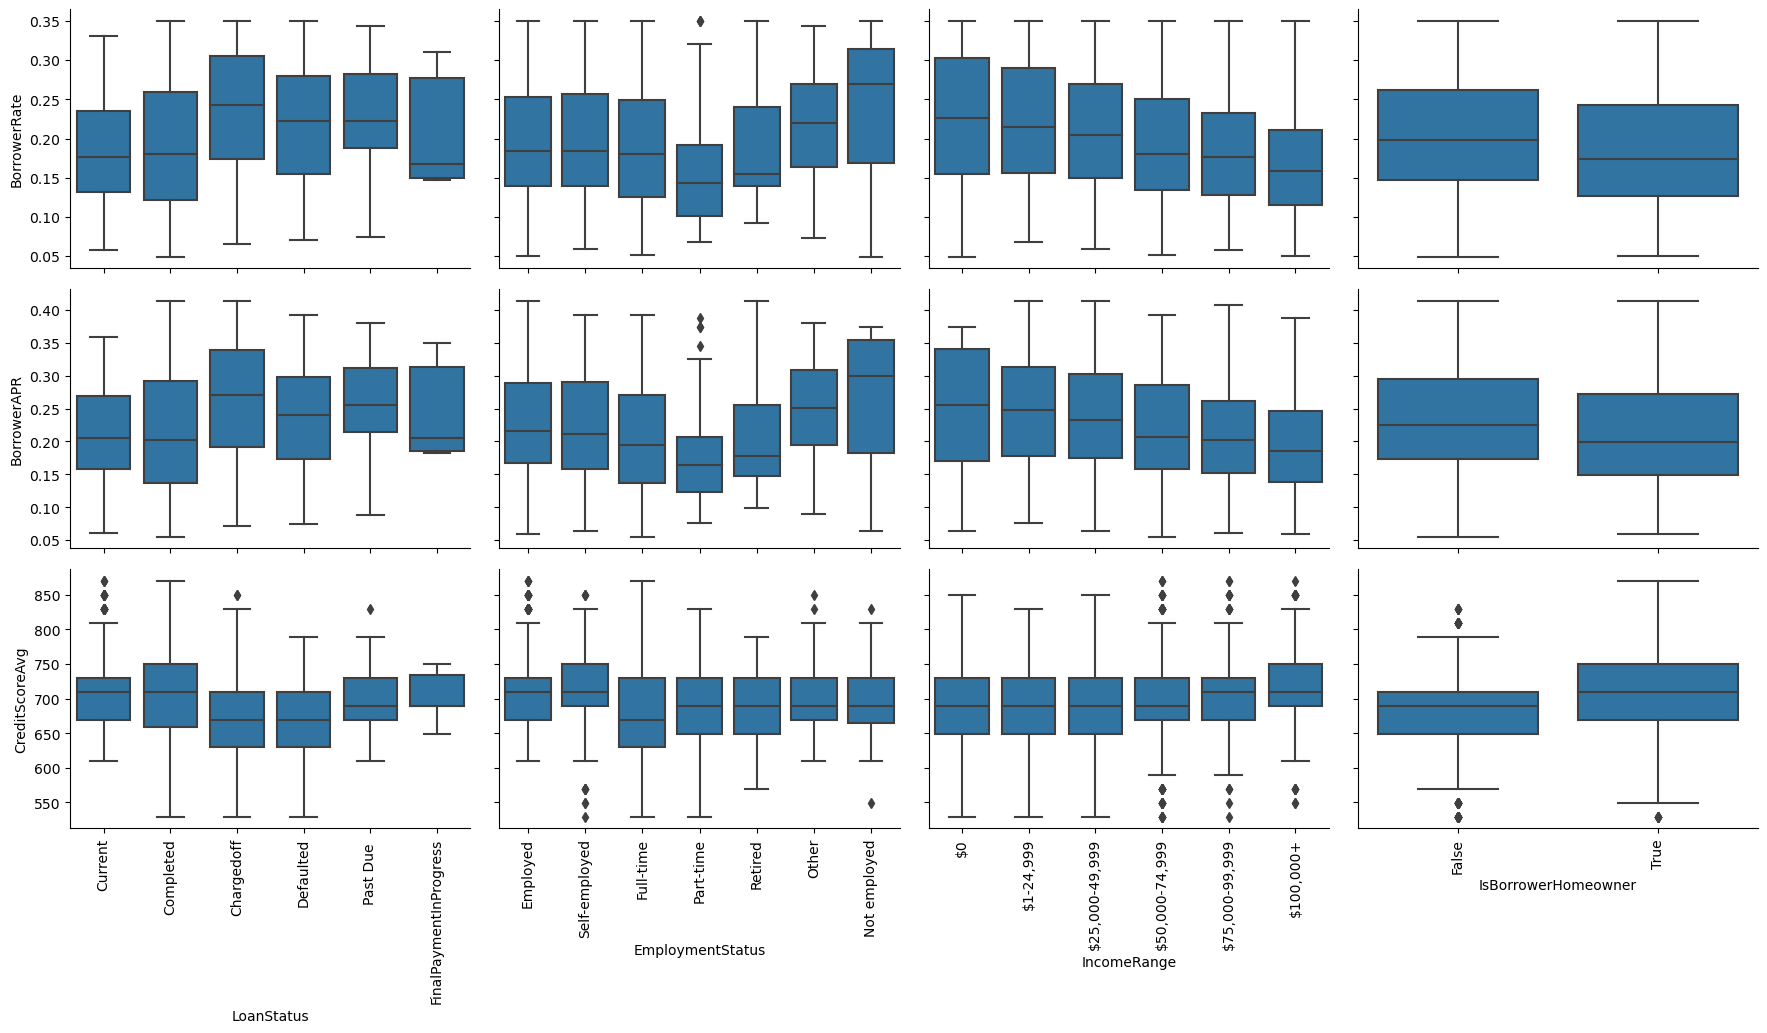

In [42]:
# plot matrix of numeric features against categorical features using a higher sample of 5000
prosperloan_samp = prosperloan.sample(n=5000, replace = False)

def boxgrid(x, y, **kwargs):
    """ creating box plots with seaborn's PairGrid. """
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)
    plt.xticks(rotation=90);

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = prosperloan_samp, y_vars = ['BorrowerRate','BorrowerAPR', 'CreditScoreAvg'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

As expected, the boxplots show that the borrowers with the highest credit scores and lowest interest & annual percentage rates are those who have a history of having completed loan payments or who still have a current loan status. These people are mostly employed and earning income within the range of 75,000 usd and above. Also, most are homeowners. 
Interestingly, the plot indicates that unemployed people earning $0 have very high credit scores too, though, their corresponding borrower APR and interest rates are the highest.

Conversely, borrowers who have defaulted or had their debts charged off have low credit scores and high interest rates.

<Figure size 1000x1000 with 0 Axes>

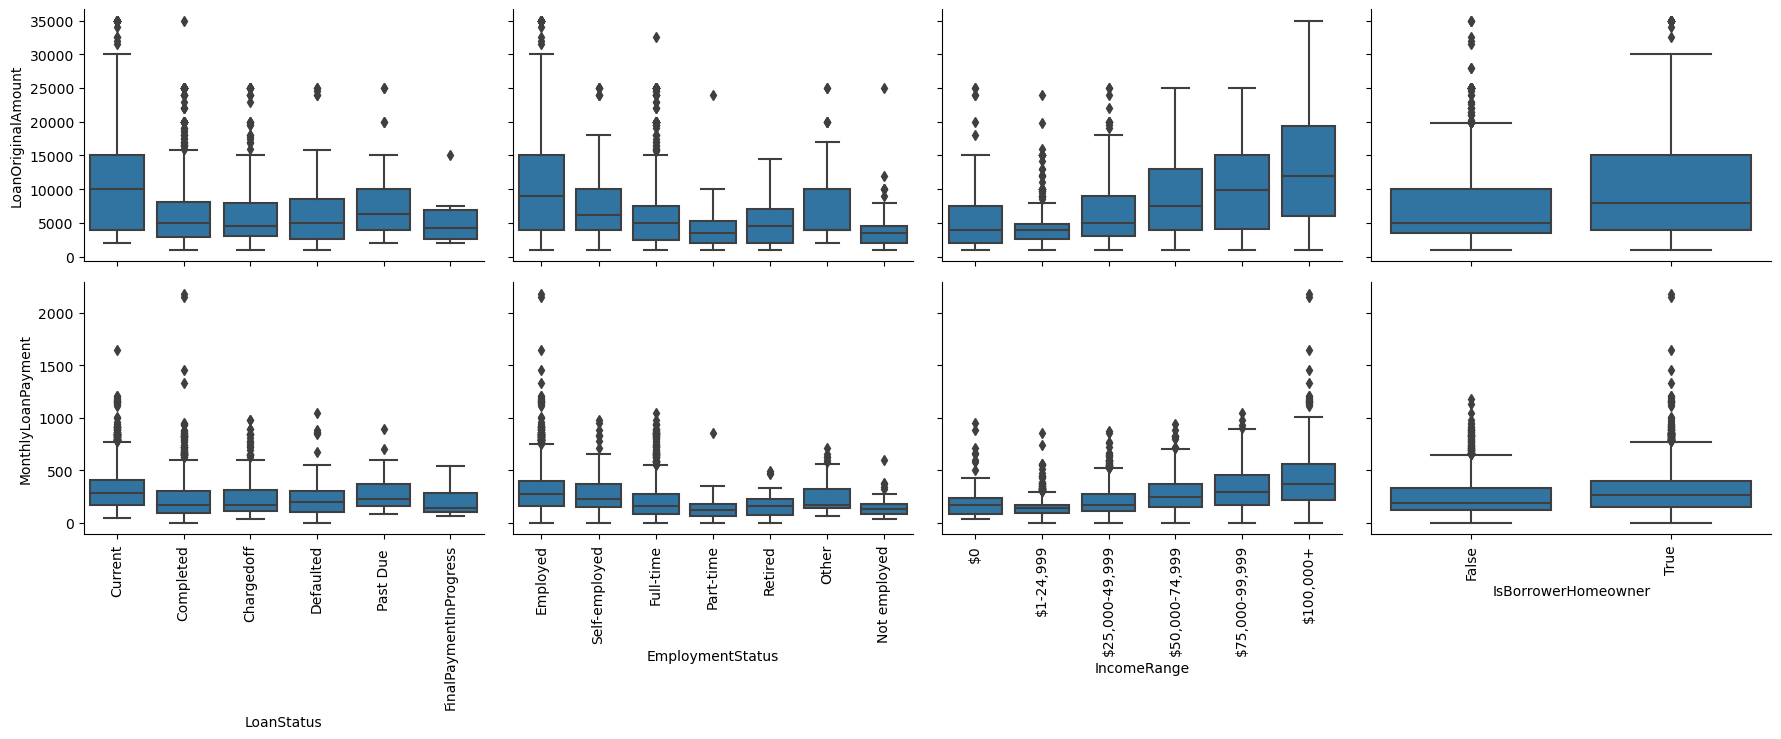

In [43]:
plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = prosperloan_samp, y_vars = ['LoanOriginalAmount', 'MonthlyLoanPayment'], x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

Each set of box plots relating the 2 numerical features to the categorical variables are similar. More borrowers with a 'current' loan status were given higher loan amounts. These borrowers are mostly employed with the loan amounts increasing with every increase in income range. Again, more homeowners were given higher loan amounts than those that did not own homes.

It is also observed that the borrowers that have completed loan payments are depicted in the boxplots to have been issued one of the lowest loan amounts.

Next, looking at the relationship between the categorical features and the variable of interest - loan status.

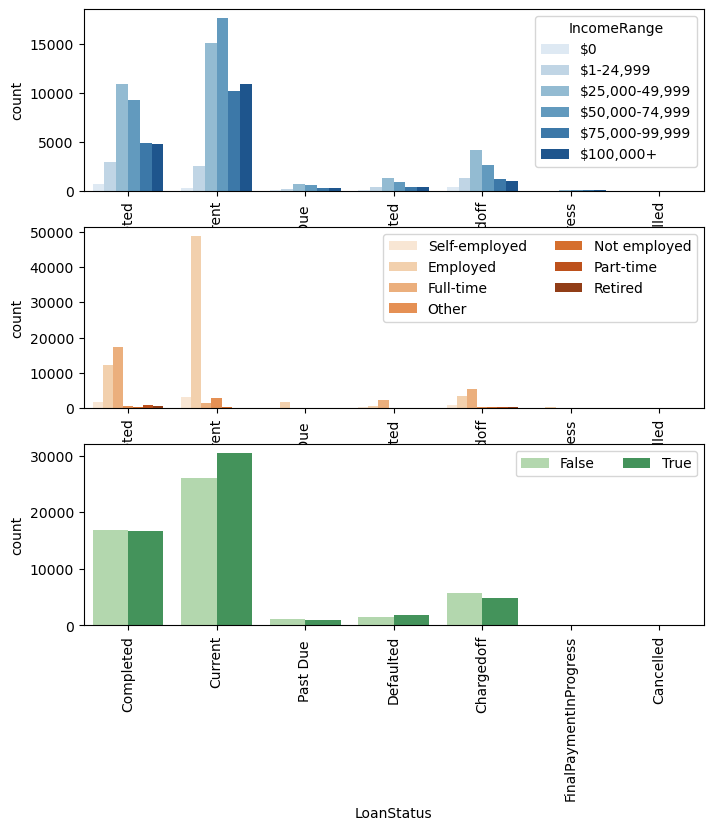

In [44]:
# using the full data to create the three subplots below with different color palettes
['LoanStatus', 'EmploymentStatus', 'IncomeRange', 'IsBorrowerHomeowner']
plt.figure(figsize = [8, 8])

# subplot 1: LoanStatus vs IncomeRange
plt.subplot(3, 1, 1)
sns.countplot(data = prosperloan, x = 'LoanStatus', hue = 'IncomeRange', palette = 'Blues')
plt.xticks(rotation=90);

# subplot 2: LoanStatus vs. EmploymentStatus
ax = plt.subplot(3, 1, 2)
sns.countplot(data = prosperloan, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Oranges')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping
plt.xticks(rotation=90);

# subplot 3: LoanStatus vs. IsBorrowerHomeowner
ax = plt.subplot(3, 1, 3)
sns.countplot(data = prosperloan, x = 'LoanStatus', hue = 'IsBorrowerHomeowner', palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.xticks(rotation=90);

plt.show()

The clustered bar charts above show that most borrowers in the 'completed' and 'current' categories of loan status have majority of their income range between 25k-75k usd and are employed. This is also true for other categories; 'past due', 'defaulted' and 'charged off' but to much lesser degress. There are also more homeowners with 'current' loan status and surprisingly 'defaulted' loan status than those who do not own a home. The frequency of loans of which their borrowers have completed payments seems to be equal to their counterparts. Lastly, for each clustered bar chart, the categories; 'FinalPaymentInProgress' and 'Cancelled' are very low, almost insignificant in the distribution of loan status.

Following the initial broad outlook of the bivariate relationships of the features, I would like to explore some of the relationships more using all of the data points present. First, the Borrower interest rate and APR are plotted on a scatter plot.

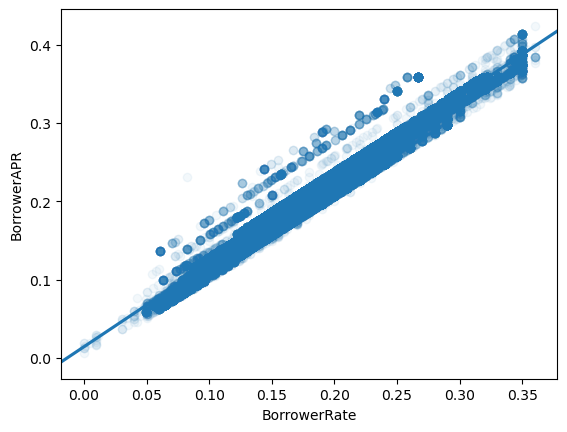

In [45]:
sns.regplot(data = prosperloan, x = 'BorrowerRate', y = 'BorrowerAPR', truncate=False, scatter_kws={'alpha':1/20});#, x_jitter=0.3);

The plot suggests that bothe variables - BorrowerRate and BorrowerAPR are directly proportional to one another i.e an increase in borrower's interest rate will yield a corresponding increase in the BorrowerAPR. For certain data points, an increase in the borrower rate yields an even higher APR value which means that despite the positive correlation, some points do not show an equal proportional increase when compared to other data points.

For further analyses involving the loan status and these two variables, only the BorrowerRate will be employed to derive insights, as similar results is expected if one used the BorrowerAPR instead. 

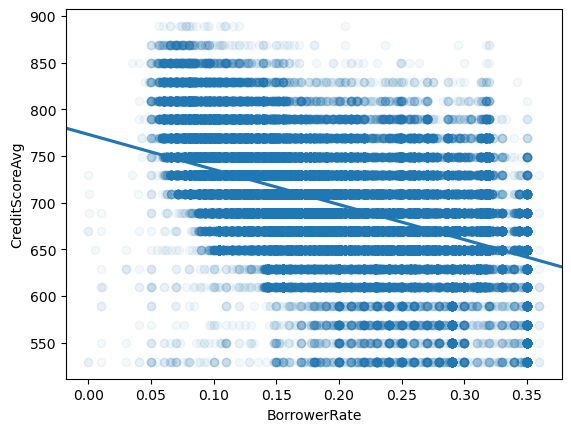

In [46]:
# Also, let's explore even further the relationship between the credit score and the borrower rate.
sns.regplot(data = prosperloan, x = 'BorrowerRate', y = 'CreditScoreAvg', truncate=False, scatter_kws={'alpha':1/20});

For the most part, credit score appears negatively correlated with the borrower's interest rate which makes sense as those individuals that have built up their credit scores to higher values might be rewarded with low interest rates when they opt to take loans. There are however some few data points that are exceptions, the plot shows some points with low credit scores and low interest rates. Likewise, there are some data points with high credit scores and interest rates.

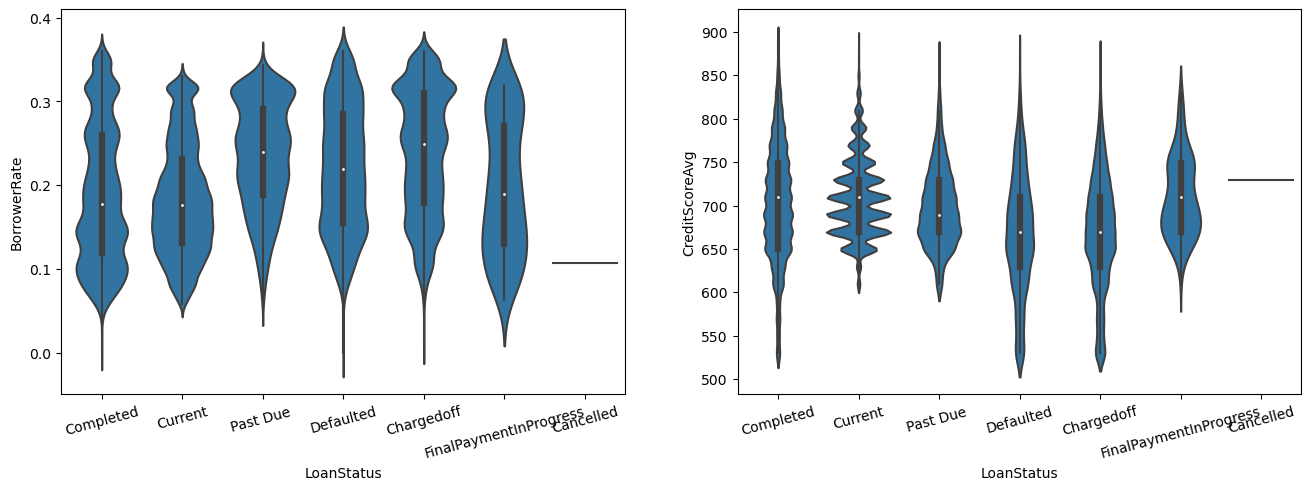

In [47]:
# Next, plot loan status against the numerical variables with the full data this time
# to have a fuller picture of the distribution of points
def violin_plot(x,y1,y2):
    plt.figure(figsize = [16, 5])
    base_color = sns.color_palette()[0]
    
    plt.subplot(1, 2, 1)
    #Let's return the axes object
    ax1 = sns.violinplot(data=prosperloan, x=x, y=y1, color=base_color, inner= 'box')
    plt.xticks(rotation=15);

    plt.subplot(1, 2, 2)
    sns.violinplot(data=prosperloan, x=x, y=y2, color=base_color, inner= 'box')
    plt.xticks(rotation=15);

violin_plot(x='LoanStatus',y1='BorrowerRate',y2='CreditScoreAvg')

The violin plots show that there are more lower borrower rate values with corresponding high credit score values for loan records with either a 'completed' or 'current' loan status. Conversely, loans that have been defaulted, charged off or past due agreed payment timelines have lower credit scores and higher values for interest rates.


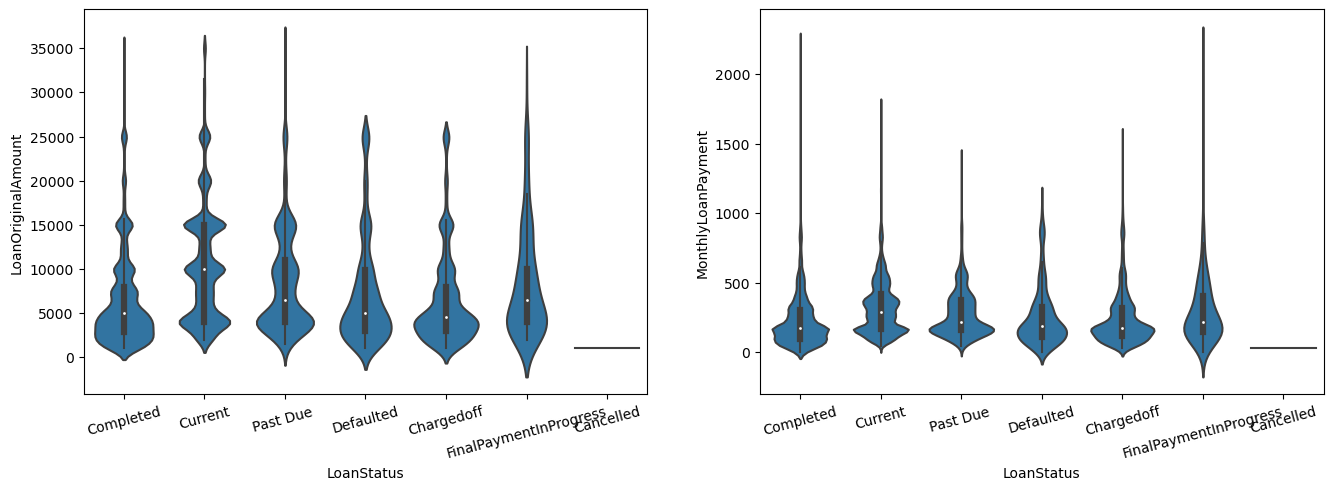

In [48]:
# Loan status vs loan original amount and monthly loan payment
violin_plot(x='LoanStatus',y1='LoanOriginalAmount',y2='MonthlyLoanPayment')

The distribution of the violin plots above show significant similarities. There are more lower end values for loan amount (~ 0 -15000 usd) as well as the monthly loan payment (~ 0-700 usd) variables for each category of loan status. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Exploring the loan status relationship with other features showed that loan records with a positive loan status (current or completed) were generally associated with gainfully employed individuals that are mostly homeowners with high credit score values. These individuals were also issued high loan amounts in most cases, however, the data also showed in other cases, that those borrowers with a 'completed' loan status were issued low loan amounts. Also, individuals in this category were issued lower interest rates than their counterparts who had loans that were defaulted, charged off or past due agreed payment timelines.
> There were also more homeowners with 'defaulted' loan status than those who did not own a home, however slight the difference was.


> Interestingly, I observed that unemployed people earning 0 usd surprisingly had very high credit scores, though, their corresponding borrower APR and interest rates were amongst the highest. This individuals might be explained as those who probably do not work regular jobs and might not have a steady source of income. They have however built high credit scores for themselves but Prosper is likely to give them loans with higher interest rates in order to protect themselves in cases of loan defaults.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I noticed that credit score mostly appeared to be negatively correlated with the borrower's interest rate which was reasonable seeing as Prosper might want to reward/entice those individuals with reputable financial status evident from their high credit scores with low interest rates to encourage loan requests with a reduced financial risk on their end. 
> However, upon varying the transparency of the plot, there were some few data points with low credit scores and low interest rates as well as points with high credit scores and high interest rates.

> In addition, I noticed positive relationships between the Borrower rate and APR, as well as the loan original amounts and the monthly loan payments. 

<a id='multi'></a>
## Multivariate Exploration

> In this part of analysis, I would like to see how the 3 seemingly most important numerical variables - BorrowerRate, APR and credit score relate with one another and my variable of interest - loan status, especially those exceptional areas where low interest rates were given to individuals with low credit scores. In addition, I am interested in exploring more how being a home owner could affect loan status considering the credit score.

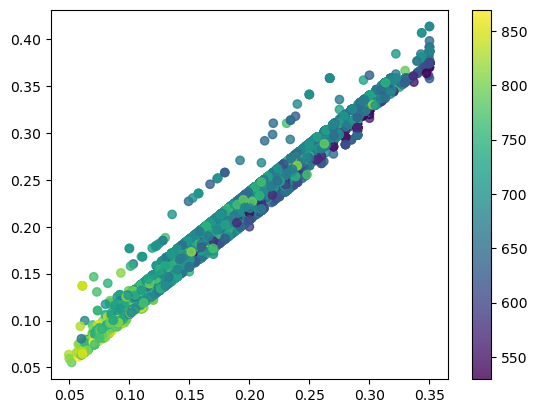

In [49]:
# comparing borrower rate, APR and credit score
plt.scatter(data = prosperloan_samp, x = 'BorrowerRate', y = 'BorrowerAPR', c = 'CreditScoreAvg', alpha = 0.8)
plt.colorbar()

The scatter plot of the borrower interest rates and APR with color encoding for the credit score variable show that the higher credit score values are more concentrated at the lower end of the plot while lower credit scores are more concentrated at the plot's higher end. Most values lie along the central line of the data's plot and seem to range from 690 - 750.

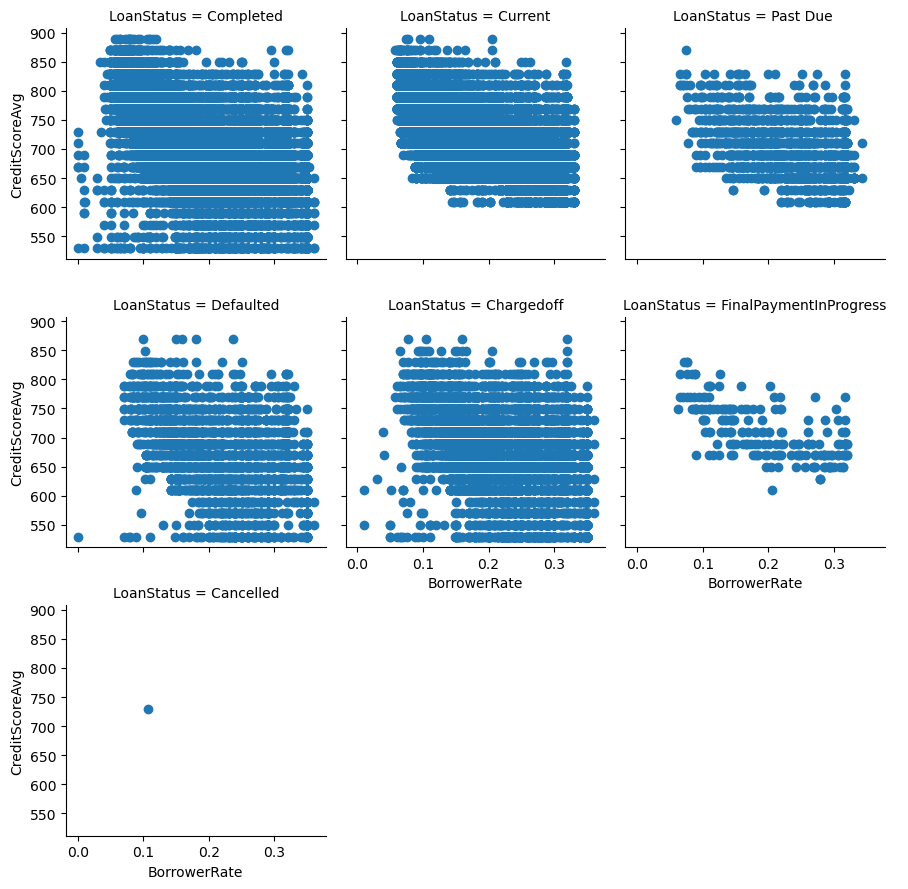

In [50]:
# comparing creditscore, borrower rate and how it affects loan status
# prosperloan_samp = prosperloan.sample(n=3000, replace = False)
g = sns.FacetGrid(data = prosperloan, col = 'LoanStatus', col_wrap = 3)
g.map(plt.scatter, 'BorrowerRate','CreditScoreAvg')
g.add_legend()

Faceting the bivariate plots of credit score vs borrower rate across the different categorical levels of loan status, it is clearer the areas that show Prosper issuing low interest rate loans to borrowers with low credit scores - these have loan status of either 'completed', 'defaulted' or 'charged off'.

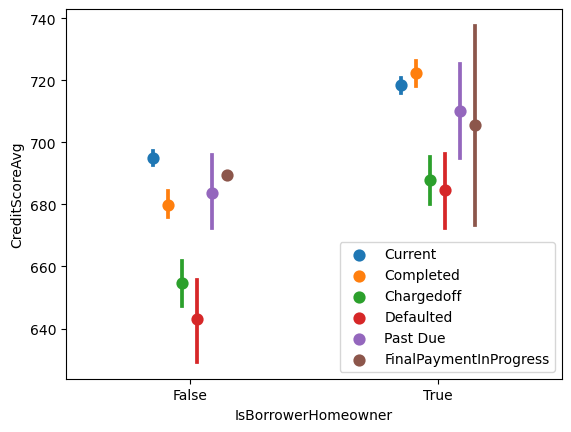

In [51]:
# investigating creditscore, Isborrowerhomeowner and loan status
ax = sns.pointplot(data = prosperloan_samp, x = 'IsBorrowerHomeowner', y = 'CreditScoreAvg', hue = 'LoanStatus',
                  dodge = 0.3, linestyles = "")
ax.legend(loc = 4, ncol = 1)

The line plot above shows that homeowners have higher credit scores across all levels of the categorical variable, loan status-  more than those who do not have homes. Amongst the homeowners, those who have completed loan payments or have 'current' loan status have higher credit scores than those who are past due or have defaulted. 
Generally, owning a home can improve one's credit score to a significant level.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Faceting the bivariate plots of credit score vs borrower rate across the different categorical levels of loan status, helped to illuminate the areas observed previously that indicated Prosper issued low interest loans to borrowers with low credit scores - these points were mostly concentrated along the plots for which loan status was either 'completed', 'defaulted' or 'chaarged off'.
### Were there any interesting or surprising interactions between features?

> There seemed to be a reasonable increase in the credit scores of homeowners across all categorical levels of loan status more than those who do not have homes. However, this isn't all that surprising since generally, owning properties tends to improve one's credit score to a significant level. 